In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/kaggle/input/dataset-1/Dataset_A.csv")

data = df.values
X = data[:, :-1]
labels = data[:, -1]

In [11]:
num_classes = len(np.unique(labels))
Y = np.eye(num_classes)[labels.astype(int)]

In [12]:
X_train, X_test, Y_train, Y_test, labels_train, labels_test = train_test_split(
    X, Y, labels, test_size=0.2, random_state=42
)

In [13]:
class NeuralNetwork:
    def __init__(self, input_dim, h1, h2, h3, output_dim, lr=0.01):
        self.lr = lr

        self.W1 = np.random.randn(input_dim, h1) / np.sqrt(input_dim)
        self.W2 = np.random.randn(h1, h2) / np.sqrt(h1)
        self.W3 = np.random.randn(h2, h3) / np.sqrt(h2)
        self.W4 = np.random.randn(h3, output_dim) / np.sqrt(h3)

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def sigmoid_deriv(self, x):
        return x * (1 - x)

    def softmax(self, x):
        e = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e / np.sum(e, axis=1, keepdims=True)

    def feedforward(self, X):
        self.z1 = X @ self.W1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = self.a1 @ self.W2
        self.a2 = self.sigmoid(self.z2)

        self.z3 = self.a2 @ self.W3
        self.a3 = self.sigmoid(self.z3)

        self.z4 = self.a3 @ self.W4
        self.output = self.softmax(self.z4)

        return self.output

    def backprop(self, X, Y):
        m = X.shape[0]

        d4 = (self.output - Y) / m
        dW4 = self.a3.T @ d4

        d3 = (d4 @ self.W4.T) * self.sigmoid_deriv(self.a3)
        dW3 = self.a2.T @ d3

        d2 = (d3 @ self.W3.T) * self.sigmoid_deriv(self.a2)
        dW2 = self.a1.T @ d2

        d1 = (d2 @ self.W2.T) * self.sigmoid_deriv(self.a1)
        dW1 = X.T @ d1

        self.W4 -= self.lr * dW4
        self.W3 -= self.lr * dW3
        self.W2 -= self.lr * dW2
        self.W1 -= self.lr * dW1

    def train(self, X, Y, epochs=3000):
        losses = []
        for i in range(epochs):
            out = self.feedforward(X)
            loss = -np.sum(Y * np.log(out + 1e-9)) / X.shape[0]
            losses.append(loss)
            self.backprop(X, Y)

            if i % 500 == 0:
                print(f"Epoch {i}, Loss = {loss:.4f}")

        return losses

Epoch 0, Loss = 1.8133
Epoch 500, Loss = 1.5890
Epoch 1000, Loss = 1.5014
Epoch 1500, Loss = 1.2047
Epoch 2000, Loss = 1.0848
Epoch 2500, Loss = 1.0267


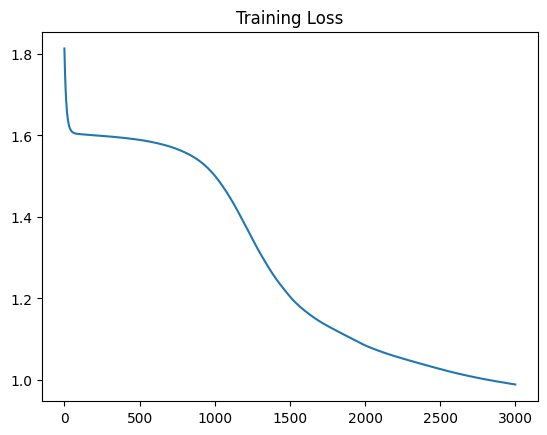

In [14]:
input_dim = X.shape[1]

nn = NeuralNetwork(
    input_dim=input_dim,
    h1=32,
    h2=24,
    h3=16,
    output_dim=num_classes,
    lr=0.05
)

losses = nn.train(X_train, Y_train, epochs=3000)

plt.plot(losses)
plt.title("Training Loss")
plt.show()

In [15]:
pred_probs = nn.feedforward(X_test)
pred_labels = np.argmax(pred_probs, axis=1)

print("\nCLASSIFICATION REPORT")
print(classification_report(labels_test, pred_labels))


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       119
           1       0.56      0.56      0.56       126
           2       0.39      0.24      0.30       112
           3       0.59      0.13      0.22       127
           4       0.44      0.96      0.61       116

    accuracy                           0.54       600
   macro avg       0.55      0.54      0.49       600
weighted avg       0.55      0.54      0.49       600



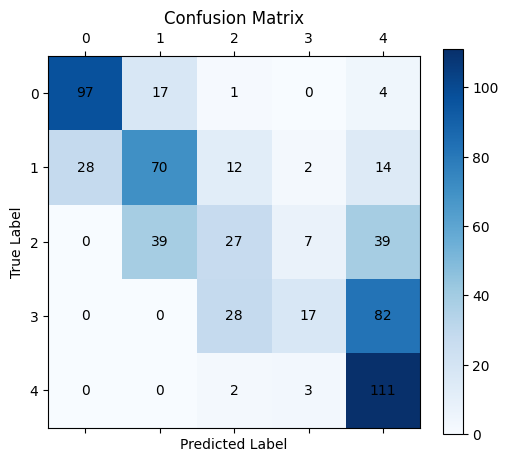

In [16]:
cm = confusion_matrix(labels_test, pred_labels)

fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(cm, cmap="Blues")
fig.colorbar(cax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")

for (i, j), value in np.ndenumerate(cm):
    ax.text(j, i, f"{value}", ha="center", va="center", color="black")

plt.show()